In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

14.978452118235694 -150.6252011951155
44.35285868266064 -35.17171946721385
-48.44135532979415 -68.83662730072345
-74.23845796506045 -110.56898354929973
-64.0912371302391 146.07511379048856
-1.3363566967366438 -129.36577407485535
55.34635510484796 -12.114533656067806
-47.76743557493716 -16.023251972543193
21.42238742897584 28.381777491519443
-36.78603960809501 -21.22519698631865
11.942607053752823 -151.73639801843726
56.61946148263311 -155.02999172114068
35.53062726984467 -169.08157766780727
35.131884947324195 -126.25913807061522
16.920382235765388 160.07574164988245
-35.0492465390858 94.28599151222659
72.31009664886534 -147.92771910510865
-1.8993784121457225 -109.00540485546884
63.143276306060926 32.1765492707315
72.23921751650602 24.627161048811786
-71.84395818214578 -169.90753686658215
36.572797749434855 -141.95918196690522
-88.1298436901825 -30.918168309681988
-41.17595653370451 -5.311009836474653
26.8358880941461 -152.43333562276862
29.147197813327665 144.2151434594606
79.376472809

-14.867394976429622 26.2345755513025
19.34624080327079 63.49226713727893
18.776555380603114 -86.72791763150369
43.02327202724507 -47.2649445970975
-24.420534382461113 -174.62057843577008
-26.552197047612452 149.49835989178388
25.17353926626616 14.522974619080372
-74.12401261067225 -89.0586153706983
45.50660759317674 -65.72232428197502
-70.6207661658809 58.3995964116082
19.68692161918186 13.311837275207438
37.40857503485934 -86.58296846208995
-74.64349346799366 65.89119902556385
-89.06085041541893 103.82673392059672
54.26290363817017 -14.33970532112221
-85.55484747890304 84.89193396374287
-4.632148585943398 165.34080705970973
53.40586757196451 -35.439493149443194
-37.29680434090617 92.51125017530165
50.973602539338316 -23.13848663227131
-6.844855586037895 117.86782251748923
-2.2876798699401064 66.60170069691108
75.99185018715042 -71.9055023521372
88.52248759635953 179.751998450587
59.15629817425889 -64.5990078994061
-61.38678130392279 176.10746350859762
47.99093873373985 177.46340853531

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [10]:
import requests
requests.__version__


'2.27.1'

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = f"https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&&units=imperial&appid={weather_api_key}"

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | comodoro rivadavia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | westport
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | marawi
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | half moon bay
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | porosozero
Processing Record 19 of Set 1 | havoysund
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of

City not found. Skipping...
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | kumylzhenskaya
Processing Record 39 of Set 4 | dudinka
Processing Record 40 of Set 4 | manzil kamil
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | smolenka
Processing Record 43 of Set 4 | yanan
City not found. Skipping...
Processing Record 44 of Set 4 | port-cartier
Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | gao
Processing Record 49 of Set 4 | mocuba
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | ahipara
Processing Record 4 of Set 5 | deer lake
Processing Record 5 of Set 5 | ayan
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | lannion
Processing Record 8 of Set 5 | atasu
Processing Record 9 of Set 5 | sharan
Processing Record 1

Processing Record 27 of Set 8 | mileanca
Processing Record 28 of Set 8 | faya
Processing Record 29 of Set 8 | lata
Processing Record 30 of Set 8 | kalmunai
Processing Record 31 of Set 8 | mareeba
Processing Record 32 of Set 8 | nazarovo
Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | narsaq
Processing Record 35 of Set 8 | oussouye
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | samusu
City not found. Skipping...
Processing Record 41 of Set 8 | qandala
Processing Record 42 of Set 8 | saint-pierre
Processing Record 43 of Set 8 | bamiantong
Processing Record 44 of Set 8 | ciledug
City not found. Skipping...
Processing Record 45 of Set 8 | brigantine
Processing Record 46 of Set 8 | lafiagi
Processing Record 47 of Set 8 | thano bula khan
City not found. Skipping...
Processing Record 48 of Set 8 | vika

Processing Record 11 of Set 12 | mufumbwe
Processing Record 12 of Set 12 | aswan
Processing Record 13 of Set 12 | vanimo
Processing Record 14 of Set 12 | ust-tsilma
Processing Record 15 of Set 12 | ballina
Processing Record 16 of Set 12 | sydney
Processing Record 17 of Set 12 | lexington
Processing Record 18 of Set 12 | beyneu
Processing Record 19 of Set 12 | toora-khem
Processing Record 20 of Set 12 | belle fourche
Processing Record 21 of Set 12 | tingo maria
Processing Record 22 of Set 12 | alikalia
Processing Record 23 of Set 12 | lorengau
Processing Record 24 of Set 12 | ketchikan
Processing Record 25 of Set 12 | ust-shonosha
Processing Record 26 of Set 12 | roquetas de mar
Processing Record 27 of Set 12 | maumere
Processing Record 28 of Set 12 | aleksandrovskoye
Processing Record 29 of Set 12 | karratha
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | pokrovskoye
Processing Record 32 of Set 12 | north bend
Processing Record 33 of Set 12 | necochea
Process

In [19]:
len(city_data)

565

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,88.29,66,40,9.22,US,2022-06-13 22:34:06
1,Ribeira Grande,38.5167,-28.7000,63.41,80,42,11.65,PT,2022-06-13 22:32:52
2,Comodoro Rivadavia,-45.8667,-67.5000,57.06,47,0,10.36,AR,2022-06-13 22:33:25
3,Punta Arenas,-53.1500,-70.9167,42.91,75,0,6.91,CL,2022-06-13 22:37:50
4,Hobart,-42.8794,147.3294,39.27,91,75,5.75,AU,2022-06-13 22:37:50
5,Atuona,-9.8000,-139.0333,77.63,69,6,16.98,PF,2022-06-13 22:37:51
6,Westport,41.1415,-73.3579,84.15,59,75,9.22,US,2022-06-13 22:37:51
7,Jamestown,42.0970,-79.2353,75.52,76,23,3.80,US,2022-06-13 22:33:37
8,Marawi,7.9986,124.2928,70.88,92,89,2.64,PH,2022-06-13 22:37:52
9,Sao Joao Da Barra,-21.6403,-41.0511,66.38,75,91,16.49,BR,2022-06-13 22:37:52


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-06-13 22:34:06,19.7297,-155.0900,88.29,66,40,9.22
1,Ribeira Grande,PT,2022-06-13 22:32:52,38.5167,-28.7000,63.41,80,42,11.65
2,Comodoro Rivadavia,AR,2022-06-13 22:33:25,-45.8667,-67.5000,57.06,47,0,10.36
3,Punta Arenas,CL,2022-06-13 22:37:50,-53.1500,-70.9167,42.91,75,0,6.91
4,Hobart,AU,2022-06-13 22:37:50,-42.8794,147.3294,39.27,91,75,5.75
5,Atuona,PF,2022-06-13 22:37:51,-9.8000,-139.0333,77.63,69,6,16.98
6,Westport,US,2022-06-13 22:37:51,41.1415,-73.3579,84.15,59,75,9.22
7,Jamestown,US,2022-06-13 22:33:37,42.0970,-79.2353,75.52,76,23,3.80
8,Marawi,PH,2022-06-13 22:37:52,7.9986,124.2928,70.88,92,89,2.64
9,Sao Joao Da Barra,BR,2022-06-13 22:37:52,-21.6403,-41.0511,66.38,75,91,16.49


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# STEM project
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

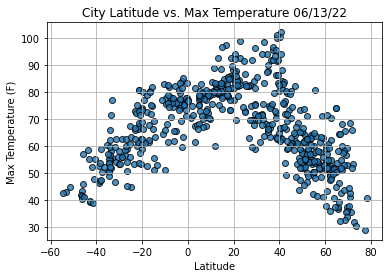

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

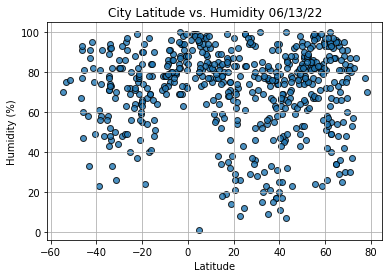

In [26]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

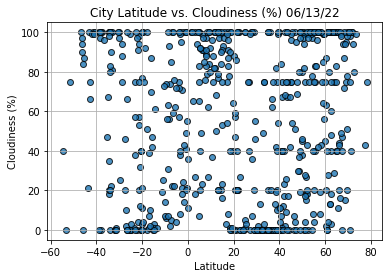

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

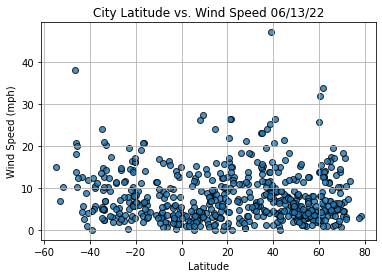

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [123]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [124]:
# Index 13 data from teh city_data_df
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-06-13 22:37:54
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.34
Humidity                       77
Cloudiness                     18
Wind Speed                  13.42
Name: 13, dtype: object

In [125]:
# Lats >= 0 (Northern Hemisphere)
#city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [126]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

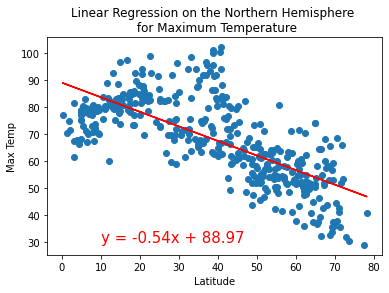

-0.7077551186817219


In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,30))


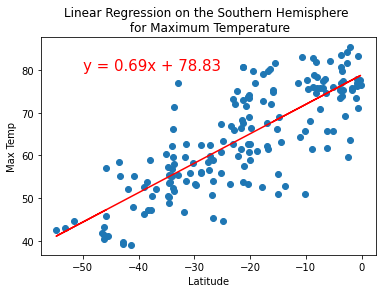

0.785684482549566


In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))


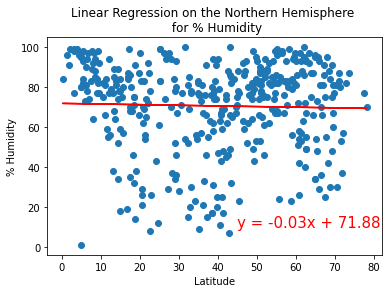

-0.028780694459663136


In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))


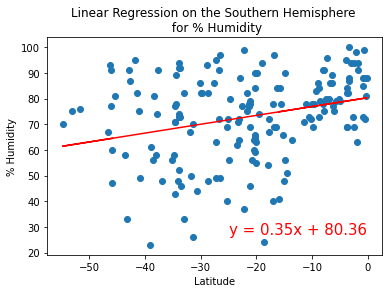

0.28457640050088834


In [130]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,27))


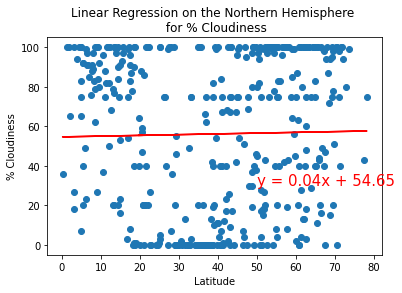

0.01992690297395627


In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,30))

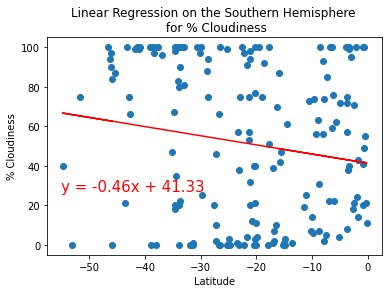

-0.16320145178578027


In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,27))

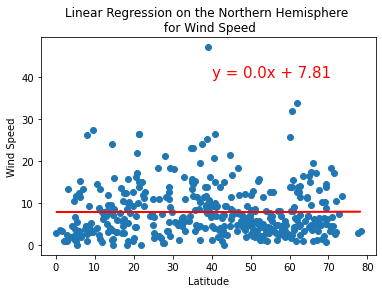

0.006114189868051609


In [146]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,40))

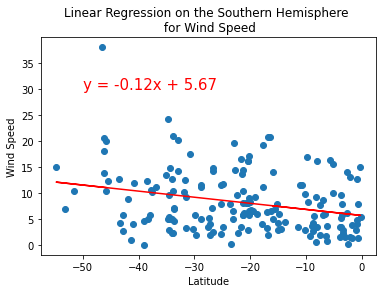

-0.27558967448228233


In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))